# Livro: An Introduction to Estatistical Learning

## Seção: 9.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
from PIL import Image, ImageDraw


INPUT_DIR = 'C:/Users/Igor/Desktop/TÓPICOS 2/Bancos'

iris = pd.read_csv(f'{INPUT_DIR}/IRIS.csv') #Iris Flower Dataset



def cm_to_inch(value):
    return value/2.54

Seção trata de SVM's dentro de um contexto de classificação em que cada observação pode ser classificada em mais de duas classes distintas - **Classificação Politômica**

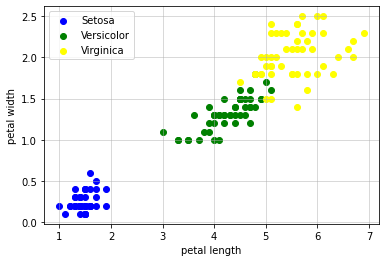

In [13]:

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='blue', label = 'Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')
plt.legend()
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.grid(True, alpha = .6)
plt.show()

## Iterações para One-Versus-All Classification

* Comparar, para cada classe possível, ela com uma classe arbitrária dita como não ela

* O número total de iterações vai ser o número de classes

* Dentro de cada Iteração $ y_i $ é o mesmo de antes:

  $ y_i = +1 $ caso o ponto esteja acima do separador e $ y_i = -1 $ caso contrário


## 1

Setosa com não Setosa

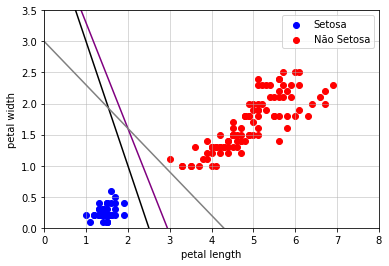

In [3]:
# Dados perfeitamente separáveis => Maximal Margin Classifier

x = np.linspace(0, 7, num=100)
y1 = -2 * x + 5    #candidato à Maximal Margin Classifier
y2 = -1.7 * x + 5  #candidato à Maximal Margin Classifier -> mais adequado entre todos
y3 = -0.7 * x + 3  #candidato à Maximal Margin Classifier



plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='blue', label = 'Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'Não Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red')
plt.plot(x, y1, color = 'black')
plt.plot(x, y2, color = 'purple')
plt.plot(x, y3, color = 'grey')
plt.legend()
plt.ylim((0, 3.5))
plt.xlim((0, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha = .6)
plt.show()

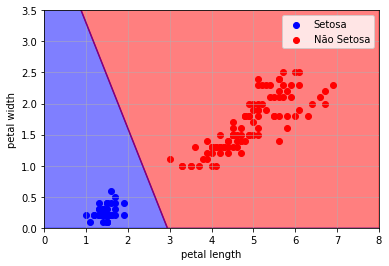

In [4]:
# Dados perfeitamente separáveis => Maximal Margin Classifier

x = np.linspace(0, 8, num=100)

y2 = -1.7 * x + 5  #candidato à Maximal Margin Classifier -> mais adequado entre os outros candidatos




plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='blue', label = 'Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'Não Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red')

plt.plot(x, y2, color = 'purple')

plt.legend()
plt.ylim((0, 3.5))
plt.xlim((0, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha = .6)

plt.fill_between(x, y2, color = 'blue', alpha = .5)
plt.fill_between(x, y2, np.max(y2), color = 'red', alpha = .5)

plt.show()

## 2

Virginica com não Virginica

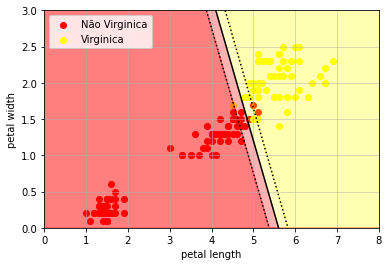

In [5]:
# Dados não são perfeitamente separáveis => Support Vector Classifier

x1 = np.linspace(0, 10, num=100)

p = np.array([4.85, 1.5]) #ponto no hyperplano
beta = np.array([2,1]) #vetor ortogonal ao hyperplano
beta0= np.inner(p, beta)

modulo_beta = np.sqrt(2**2 + 1**2) #tamanho de beta

margem = 1/modulo_beta

y = (np.inner(p, beta)-x1*2)/1 #hyperplano

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'Não Virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')

plt.plot(x1, y , color = 'black')
plt.plot(x1, y+margem, color = 'black', linestyle = 'dotted')
plt.plot(x1, y-margem, color = 'black', linestyle = 'dotted')

plt.legend()
plt.ylim((0, 3))
plt.xlim((0, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha =0.6)

plt.fill_between(x1, y-margem, color = 'red', alpha = .5)
plt.fill_between(x1, y+margem, np.max(y+margem), color = 'yellow', alpha = .3)

plt.fill_between(x1, y-margem, y, color = 'red', alpha = .3)
plt.fill_between(x1, y, y+margem, color = 'yellow', alpha = .23)

plt.show()

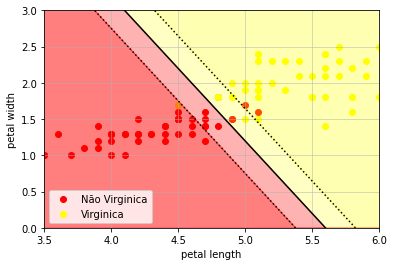

In [6]:
# Dados não são perfeitamente separáveis => Support Vector Classifier

x1 = np.linspace(0, 10, num=100)

p = np.array([4.85, 1.5]) #ponto no hyperplano
beta = np.array([2,1]) #vetor ortogonal ao hyperplano
beta0= np.inner(p, beta)

modulo_beta = np.sqrt(2**2 + 1**2) #tamanho de beta

margem = 1/modulo_beta

y = (np.inner(p, beta)-x1*2)/1 #hyperplano

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'Não Virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')

plt.plot(x1, y , color = 'black')
plt.plot(x1, y+margem, color = 'black', linestyle = 'dotted')
plt.plot(x1, y-margem, color = 'black', linestyle = 'dotted')

plt.legend()
plt.ylim((0, 3))
plt.xlim((3.5, 6))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha =0.6)

plt.fill_between(x1, y-margem, color = 'red', alpha = .5)
plt.fill_between(x1, y+margem, np.max(y+margem), color = 'yellow', alpha = .3)

plt.fill_between(x1, y-margem, y, color = 'red', alpha = .3)
plt.fill_between(x1, y, y+margem, color = 'yellow', alpha = .23)

plt.show()

# 3

Versicolor com não Versicolor



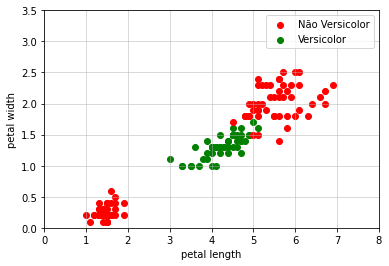

In [7]:
# Dados não são  linearmente separáveis no plano "sepal lenth" - "sepal width" => SVM

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'Não Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red')

plt.legend()
plt.ylim((0, 3.5))
plt.xlim((0, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha = 0.6)
plt.show()

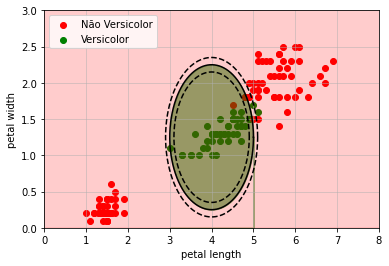

In [8]:
# Dados não são  linearmente separáveis no plano "sepal lenth" - "sepal width" => SVM

# Elipse em R^2 - candidato ao SVM com kernel polinomial de ordem maior ou igual que 2

# => No espaço de dimensão maior, o SVM com kernel polinomial ajusta um Hyperplano, nesse espaço, como separador
# => No R^2, esse Hyperplano é dado por uma Elipse

## Separador no R^2 -> Elipse

a11 = 4
b11 = 1.25
a21 = 4
b21 = 1.25
c1 = 2

# Compute ellipse parameters
a1 = c1 / 2                                # Semimajor axis
x01 = (a11 + a21) / 2                       # Center x-value
y01 = (b11 + b21) / 2                       # Center y-value
f1 = np.sqrt((a11 - x01)**2 + (b11 - y01)**2) # Distance from center to focus
b1 = np.sqrt(a1**2 - f1**2)                 # Semiminor axis
phi1 = np.arctan2((b21 - b11), (a21 - a11))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution1 = 1000
t1 = np.linspace(0, 2*np.pi, resolution1)
x1 = x01 + a1 * np.cos(t1) * np.cos(phi1) - b1 * np.sin(t1) * np.sin(phi1)
y1 = y01 + a1 * np.cos(t1) * np.sin(phi1) + b1 * np.sin(t1) * np.cos(phi1)

x11 = np.linspace(0, 10, len(x1))

# Margem1 no R^2

a12 = 4
b12 = 1.25
a22 = 4
b22 = 1.25
c2 = 1.8

# Compute ellipse parameters
a2 = c2 / 2                                # Semimajor axis
x02 = (a12 + a22) / 2                       # Center x-value
y02 = (b12 + b22) / 2                       # Center y-value
f2 = np.sqrt((a12 - x02)**2 + (b12 - y02)**2) # Distance from center to focus
b2 = np.sqrt(a2**2 - f2**2)                 # Semiminor axis
phi2 = np.arctan2((b22 - b12), (a22 - a12))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution2 = 1000
t2 = np.linspace(0, 2*np.pi, resolution2)
x2 = x02 + a2 * np.cos(t2) * np.cos(phi2) - b2 * np.sin(t2) * np.sin(phi2)
y2 = y02 + a2 * np.cos(t2) * np.sin(phi2) + b2 * np.sin(t2) * np.cos(phi2)

x12 = np.linspace(0, 10, len(x2))


## Margem2 no R^2

a13 = 4
b13 = 1.25
a23 = 4
b23 = 1.25
c3 = 2.2

# Compute ellipse parameters
a3 = c3 / 2                                # Semimajor axis
x03 = (a13 + a23) / 2                       # Center x-value
y03 = (b13 + b23) / 2                       # Center y-value
f3 = np.sqrt((a13 - x03)**2 + (b13 - y03)**2) # Distance from center to focus
b3 = np.sqrt(a3**2 - f3**2)                 # Semiminor axis
phi3 = np.arctan2((b23 - b13), (a23 - a13))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution3 = 1000
t3 = np.linspace(0, 2*np.pi, resolution3)
x3 = x03 + a3 * np.cos(t3) * np.cos(phi3) - b3 * np.sin(t3) * np.sin(phi3)
y3 = y03 + a3 * np.cos(t3) * np.sin(phi3) + b3 * np.sin(t3) * np.cos(phi3)

x13 = np.linspace(0, 10, len(x3))



plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'Não Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red')

plt.plot(x1, y1, color = "black") #plot do separador em R^2 (ellipse)
plt.plot(x2, y2,"--", color = "black") #plot da margem1 em R^2
plt.plot(x3, y3,"--", color = "black") #plot da margem2 em R^2

plt.fill_between(x1, y1, color = 'green', alpha = .5)
plt.fill_between(x11, x1, color = 'red', alpha = .2)


plt.legend()
plt.ylim((0, 3))
plt.xlim((0, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha = 0.6)



plt.show()

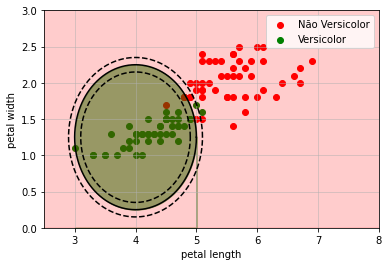

In [9]:
# Dados não são  linearmente separáveis no plano "sepal lenth" - "sepal width" => SVM

# Elipse em R^2 - candidato ao SVM com kernel polinomial de ordem maior ou igual que 2

# => No espaço de dimensão maior, o SVM com kernel polinomial ajusta um Hyperplano, nesse espaço, como separador
# => No R^2, esse Hyperplano é dado por uma Elipse

## Separador no R^2 -> Elipse

a11 = 4
b11 = 1.25
a21 = 4
b21 = 1.25
c1 = 2

# Compute ellipse parameters
a1 = c1 / 2                                # Semimajor axis
x01 = (a11 + a21) / 2                       # Center x-value
y01 = (b11 + b21) / 2                       # Center y-value
f1 = np.sqrt((a11 - x01)**2 + (b11 - y01)**2) # Distance from center to focus
b1 = np.sqrt(a1**2 - f1**2)                 # Semiminor axis
phi1 = np.arctan2((b21 - b11), (a21 - a11))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution1 = 1000
t1 = np.linspace(0, 2*np.pi, resolution1)
x1 = x01 + a1 * np.cos(t1) * np.cos(phi1) - b1 * np.sin(t1) * np.sin(phi1)
y1 = y01 + a1 * np.cos(t1) * np.sin(phi1) + b1 * np.sin(t1) * np.cos(phi1)

x11 = np.linspace(0, 10, len(x1))

# Margem1 no R^2

a12 = 4
b12 = 1.25
a22 = 4
b22 = 1.25
c2 = 1.8

# Compute ellipse parameters
a2 = c2 / 2                                # Semimajor axis
x02 = (a12 + a22) / 2                       # Center x-value
y02 = (b12 + b22) / 2                       # Center y-value
f2 = np.sqrt((a12 - x02)**2 + (b12 - y02)**2) # Distance from center to focus
b2 = np.sqrt(a2**2 - f2**2)                 # Semiminor axis
phi2 = np.arctan2((b22 - b12), (a22 - a12))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution2 = 1000
t2 = np.linspace(0, 2*np.pi, resolution2)
x2 = x02 + a2 * np.cos(t2) * np.cos(phi2) - b2 * np.sin(t2) * np.sin(phi2)
y2 = y02 + a2 * np.cos(t2) * np.sin(phi2) + b2 * np.sin(t2) * np.cos(phi2)

x12 = np.linspace(0, 10, len(x2))


## Margem2 no R^2

a13 = 4
b13 = 1.25
a23 = 4
b23 = 1.25
c3 = 2.2

# Compute ellipse parameters
a3 = c3 / 2                                # Semimajor axis
x03 = (a13 + a23) / 2                       # Center x-value
y03 = (b13 + b23) / 2                       # Center y-value
f3 = np.sqrt((a13 - x03)**2 + (b13 - y03)**2) # Distance from center to focus
b3 = np.sqrt(a3**2 - f3**2)                 # Semiminor axis
phi3 = np.arctan2((b23 - b13), (a23 - a13))   # Angle betw major axis and x-axis

# Parametric plot in t
resolution3 = 1000
t3 = np.linspace(0, 2*np.pi, resolution3)
x3 = x03 + a3 * np.cos(t3) * np.cos(phi3) - b3 * np.sin(t3) * np.sin(phi3)
y3 = y03 + a3 * np.cos(t3) * np.sin(phi3) + b3 * np.sin(t3) * np.cos(phi3)

x13 = np.linspace(0, 10, len(x3))



plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'Não Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red')

plt.plot(x1, y1, color = "black") #plot do separador em R^2 (ellipse)
plt.plot(x2, y2,"--", color = "black") #plot da margem1 em R^2
plt.plot(x3, y3,"--", color = "black") #plot da margem2 em R^2

plt.fill_between(x1, y1, color = 'green', alpha = .5)
plt.fill_between(x11, x1, color = 'red', alpha = .2)


plt.legend()
plt.ylim((0, 3))
plt.xlim((2.5, 8))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
#plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.grid(True, alpha = 0.6)



plt.show()

## Após o ajuste One-Versus-All Classification é de interesse saber classificar uma observação arbitrária

Dado um ponto $(\vec{x})^{*} \in  \mathbb{R}^{p}$ arbitrário - ponto para testar o ajuste dos modelos - vamos classificar esse ponto:

1) No contexto, $(\vec{x})^{*} = (x_1^{*}, x_2^{*}) \in \mathbb{R}^2$


2) Para cada iteração $k = 1, 2, 3$, calcule a distância com sinal do ponto até o k-ésimo **Hyperplano** separador:
   
   $ \beta_{0, k} + (\beta_{1, k})x_1^{*} + (\beta_{2, k})x_2^{*} $


   > Classifique o ponto na classe $k$ em que essa distânica for **maior** - visto que quanto maior for a distância com sinal temos mais confiança em dizer que a observação $(\vec{x})^{*}$ pertence à classe $k$ em detrimento das demais